# **Analysis of Muon lifetime data**
With this interactive notebook you can analyse the lifetime data you collected with the MuonLab III detector to find the lifetime, or characteristic time, of muons. Before you start, **upload your file to CoLab by clicking the folder on the left side of the screen, and then the file with an arrow pointing up.** The notebook is based on the programming language Python. The notebook consists of the following steps:

1. Read your data file and sort it on duration

2. Visualise your data by plotting it as a histogram

3. "Fit" your data to an exponential function to determine muon lifetime: $f(t) = Ae^{-Bt} + C$


**All steps** have **two exercises**, most of which are done by changing the code below the exercises. To execute a code cell, press **shift + enter** at the same time.



## **1. Reading data**
When you conducted your experiment(s), you might have noticed that your data was being saved in a single file ending in ".csv", standing for "comma-separated values". This file saves data of all experiments possible with the MuonLab in their own column. You can open this file and view your data using a Python library called **pandas**. This library also allows you to perform operations on your data, like sorting it.


### **Exercises**
> **1.1** Start by having the notebook import your data file. Do this by changing the variable "filename" in the code cell below to the name of your file. Make sure to add ".csv" at the end! If you entered the correct name, by running the code cell you should see the first 5 measured lifetimes appear on the screen.







In [ ]:
# imports pandas library
import pandas as pd



### EX. 1.1 ###
filename = "YOUR FILENAME HERE.csv"
######



dataframe_lifetimes = pd.DataFrame()

try:
  # reads your data file
  dataframe_total = pd.read_csv(filename)

  # selects the lifetime data
  dataframe_lifetimes['Lifetimes (ns)'] = dataframe_total['Lifetimes (ns)']
  dataframe_lifetimes.dropna(inplace=True)

except:
  print("Wrong name entered. No file has been uploaded with the name: {}".format(filename))
  pass

# show the lifetime data on screen if the filename was entered correctly
dataframe_lifetimes.head()

,Lifetimes (ns)
0,4610.0
1,330.0
2,360.0
3,2350.0
4,400.0




> **1.2** Now that your lifetime data has been loaded, you can sort the lifetimes by their length. Do this by running the code cell below, which executes the "sort_values" command. You can now view the sorted measurement data to find the **shortest time**, the **second shortest time**, the **longest time**, and the **duration of the smallest possible time step of the MuonLab**. Fill these in in the code cell below. **Note:** the bold numbers on the left are the indices of the values, and the values on the right are the times you should look at.

In [ ]:
# sorts the lifetime data from short to long
dataframe_lifetimes.sort_values(by=['Lifetimes (ns)'], inplace=True)

# shows the sorted data on screen
dataframe_lifetimes

,Lifetimes (ns)
549,110.0
265,110.0
131,120.0
263,120.0
555,120.0
...,...
86,19390.0
305,19410.0
236,19410.0
419,19940.0


In [ ]:
### EX. 1.2 ###
shortest_time = 0.0 # CHANGE THE VALUE
second_shortest_time = 0.0 # CHANGE THE VALUE
longest_time = 0.0 # CHANGE THE VALUE
duration_of_timestep = 0.0 # CHANGE THE VALUE
######



# displays the values you found on the screen
if shortest_time != 0:
  print(f"The shortest lifetime measured was: {shortest_time} ns.")
  print(f"The second shortest lifetime measured was: {second_shortest_time} ns.")
  print(f"The longest lifetime measured was: {longest_time} ns.")
  print(f"The duration of a single timestep was: {duration_of_timestep} ns.")
  
else:
  print("CHANGE THE VALUES IN THIS CODE CELL FROM 0 TO THE TIMES YOU FOUND IN THE DATA")


The shortest lifetime measured was: 110.0 ns.
The second shortest lifetime measured was: 120.0 ns.
The longest lifetime measured was: 19940.0 ns.
The duration of a single timestep was: 10.0 ns.


## **2. Plotting your data as a histogram**
Seeing your data in its "raw" form doesn't tell you much about the way it is structured. To see how often each time interval was measured, you have to visualise your data by plotting it. You will be plotting a bar chart, also known as a histogram. This type of plot has some important settings that you can adjust; **amount of bins**, **lower limit of the x-axis** and **upper limit of the x-axis**.
 


*   The amount of bins represents the amount of intervals the program will divide your data in; the amount of **bars** your plot will have.
*   The lower and upper limit of the x-axis set which possible x-values you want to display in your plot (only the values between the lower and upper limit are displayed).

### **Exercises**


> **2.1** In the code cell below, change the values **bins, lower_limit_x** and **upper_limit** until you get a good visualisation of your data. You should see a similar distribution as in the program you used to do the measurements. (hints: for the bins, think about the amount of bins you used in the measurement program. Your plot should display a smooth curve. for the x-axis limits, think about your answers to exercise **1.2**.)






In [ ]:
# imports plotting library
import matplotlib.pyplot as plt



### EX. 2.1 ###
bins = 2 # CHANGE THE VALUE
lower_limit_x = -10000
upper_limit_x = 30000
######



# plots your data in a histogram
dataframe_lifetimes.hist(bins=bins, 
                         figsize=([14,10]), 
                         linewidth=1, 
                         edgecolor='black', 
                         color=[230 / 255, 25 / 255, 61 / 255],
                        )
plt.xlim(lower_limit_x, upper_limit_x)
plt.xlabel("Time (nanoseconds)")
plt.ylabel("Counts")

NameError: ignored



> **2.2** As mentioned in the introduction, the data you took could follow a function of the form $f(t) = Ae^{-Bt} + C$, also known as an **exponential distribution**. Sketch the shape of the graph of this function on paper. Note what attributes of your sketch the function parameters $A$, $B$ and $C$ represent. You can also look at the shape of the plot you made in exercise **2.1**.


> 1.   **Parameter** $A$: *type your answer here*

> 2.   **Parameter** $B$: *type your answer here*

> 3.   **Parameter** $C$: *type your answer here*




## **3. Fitting your data to an exponential function**
Having visualised your data in a histogram and having sketched an exponential distribution, you might have observed that the shape of your data seems to match that of an exponential distribution. This means that the duration of the process you measured, namely the decay of muons, could be described with the previously seen function $f(t) = Ae^{-Bt} + C$. When applied to muon lifetime, this function takes the form $N(t) = N_0 e^{-\lambda t}$. Here $N_0$ is the amount of particles at $t=0$, $\lambda$ is the decay constant and $C = 0$. You can use another Python package called **lmfit** to find the parameters $N_0$ and $\lambda$ that make the exponential function fit your data best. Using the optimal values of these parameters you can then find the lifetime of a muon.

### **Exercises**

> **3.1** Run the following two code cells. The first cell temporarily installs the **lmfit**-module (this might take a second). The second cell first prints the results of the fitting procedure, and then plots your data and a line corresponding to the exponential function with the optimal parameter values it found for $N_0$ and $\lambda$. Check if you think the line aligns well with your data, and if it does, note the values found for $N_0$ and $\lambda$.
(**note:** the data the fit function uses **depends on the amount of bins you chose in exercise 2.1**. If your fit line doesn't align well with your data, make sure you are using a **correct amount of bins!**)

> 1.   **Value found for** $N_0$: *type your answer here*

> 2.   **Value found for** $\lambda$: *type your answer here*


In [ ]:
# installs the module (this might take a few seconds)
!pip install lmfit
from lmfit import models
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 292 kB 4.3 MB/s 
     |████████████████████████████████| 98 kB 8.9 MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.3-py3-none-any.whl size=84413 sha256=271e21a063c9eb57f5b0144c046ceac92cf1c03c5999bcffea543acd0041d515
  Stored in directory: /root/.cache/pip/wheels/b9/7a/d1/236aa0f8196b264fda481a112f7cfb1bfde7bfb20235f8e331
Successfully built lmfit


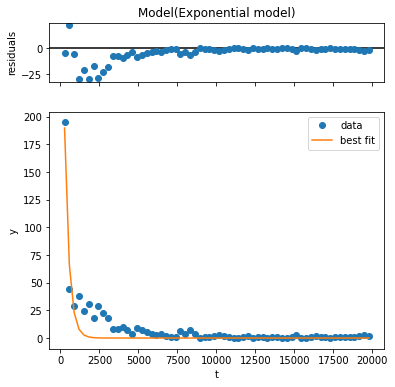

In [ ]:
# turns data into histogram data
y_data, bin_edges = np.histogram(dataframe_lifetimes['Lifetimes (ns)'], bins=bins)
t_data = bin_edges[1:] - (bin_edges[1] - bin_edges[0]) / 2

# creates model function: an exponential model + a constant C
f = lambda t, N_0, l: N_0 * np.exp(-l * t)
model = models.Model(f, name='Exponential model')

# fits your model: find the optimal values for A, B and C
fit = model.fit(y_data, t=t_data, N_0=10, l=1e-4)

# plots and displays the results of your fit
fit.plot()
fit

> **3.2** As you have shown, your data can be described using the function $N(t) = N_0 e^{-\lambda t}$, where $\lambda$ is the **decay constant**. However, this same function can also be rewritten as $N(t) = N_0 e^{- t / \tau}$, where $\tau$ is the **characteristic time**. Using this information and the optimal value of $\lambda$ you found with your fit function, find $\tau$. 

> 1. **Value found for** $\tau$: *type your answer here*

Congratulations! you have now found the decay time of muon particles using your own data.